In [189]:
import matplotlib as plt
import pandas as pd
plt.__version__
movies = pd.read_csv('movies.csv')

In [190]:
movies.head()

Movie Title  Runtime                     Genre  Award Wins  \
0            Parasite      132           Drama, Thriller           4   
1          Green Book      130  Biography, Comedy, Drama           3   
2  The Shape of Water      123   Drama, Fantasy, Romance           4   
3           Moonlight      111                     Drama           3   
4           Spotlight      129   Biography, Crime, Drama           2   

   Award Nominations  Box Office  Rated  \
0                306    53369749      R   
1                 58    85080171  PG-13   
2                136    63859435      R   
3                231    27854932      R   
4                124    45055776      R   

                                            Language            Director  
0                              ['Korean', 'English']        Bong Joon Ho  
1        ['English', 'Italian', 'Russian', 'German']      Peter Farrelly  
2  ['English', 'American Sign ', 'Russian', 'Fren...  Guillermo del Toro  
3                                        ['English']       Barry Jenkins  
4                                        ['English']        Tom McCarthy

## (Graph) What was the runtime for each movie?
In this bar graph the runtime values had to be shorted by their movie title. The Green Mile had the longest runtime of 189 minutes and The Grand Budapest had the shortest runtime of 99 minutes.

<Axes: xlabel='Movie', ylabel='Runtime (mins)'>

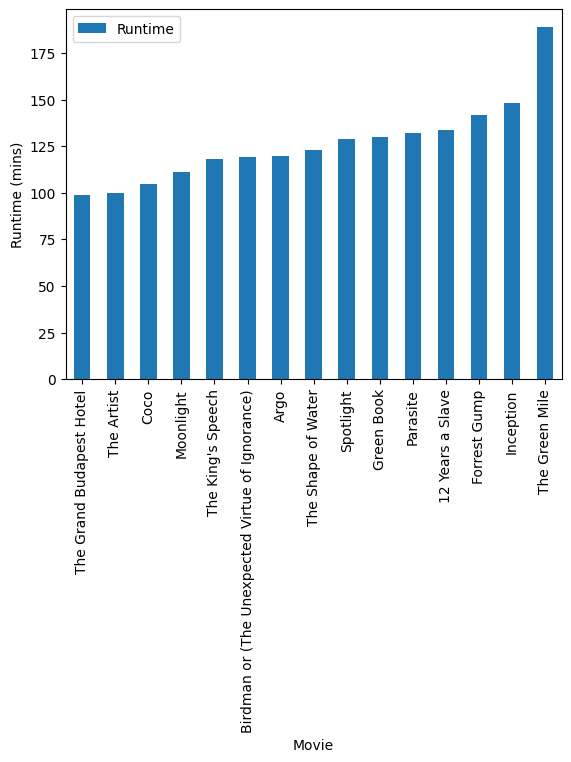

In [191]:
runtimes = movies.sort_values(by='Runtime', ascending=True)
runtimes.plot.bar(x='Movie Title', y='Runtime', xlabel='Movie', ylabel='Runtime (mins)')

## What movie had the longest runtime?
To find the movie title with the longest runtime I first had to sort the values of all the runtimes and grab the first movie title using ascending=False. The Green Mile had the longest runtime.

In [192]:
sort_time = movies.sort_values(by='Runtime', ascending=False)
long_time = sort_time.iloc[0]
print("The longest movie is:", long_time["Movie Title"])

The longest movie is: The Green Mile


## Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?
In this scatter plot the runtime values had to be sorted out and plotted along with the Award Wins to be able to see a relationship between the two. It seems if the movie was on the shorter end of runtime the more awards were won.

<Axes: title={'center': 'Relationship between runtimes and awards won.'}, xlabel='Runtime', ylabel='Award Wins'>

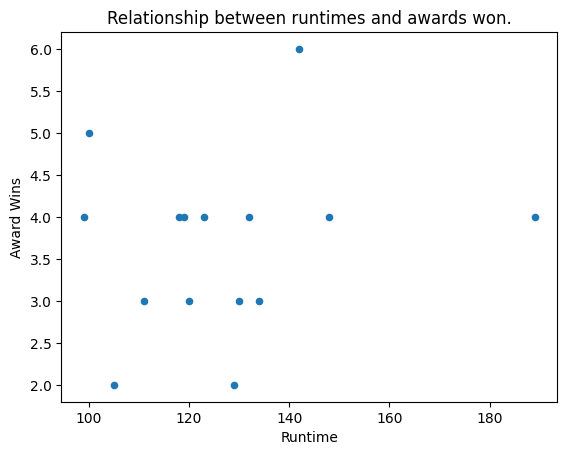

In [193]:
len_movie = movies.sort_values(by='Runtime', ascending=False)
len_movie.plot.scatter(x='Runtime', y='Award Wins', title='Relationship between runtimes and awards won.')

## (Graph) How many awards and nominations did each movie receive?
In this bar chart I first had to group the movie titles along with their Award Wins and Award Nominations. Forrest Gump had the most Award Wins but one of the least Award Nominations. Parasite had the most Award Nominationsut one of the least Award Wins.

<Axes: title={'center': 'Awards and Nominations won for each movie'}, xlabel='Movie Title'>

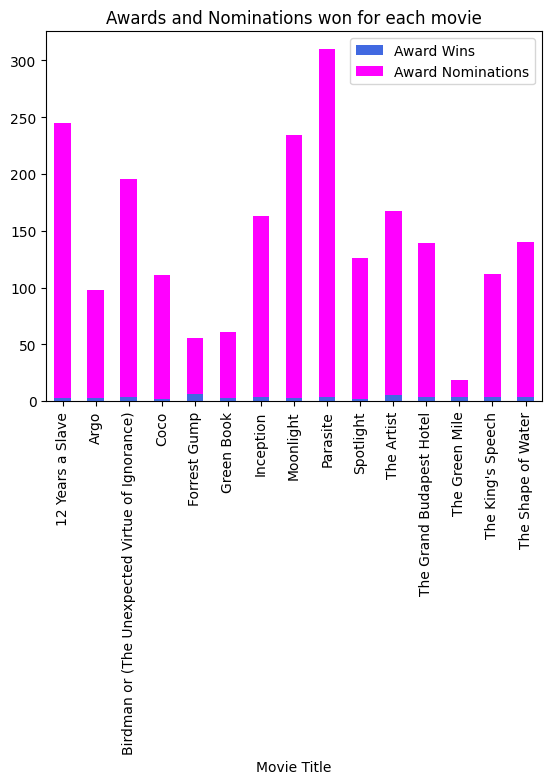

In [194]:
awards_noms = movies.groupby('Movie Title').sum().loc[:, ['Award Wins', 'Award Nominations']]
award_colors = {
    'Award Wins': 'royalblue',
    'Award Nominations': 'magenta'}
awards_noms.plot(kind= 'bar', title='Awards and Nominations won for each movie', stacked=True, color=award_colors)

## Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?
In this scatter plot the Award Wins and Award Nominations needed to be added together to get a total. The relationship between the two shows that even though box office earnings weren't the highest but most nominations went to those movies.

<Axes: title={'center': 'Relationship between Box Office earnings and total nominations.'}, xlabel='Box Office', ylabel='TotalNominations'>

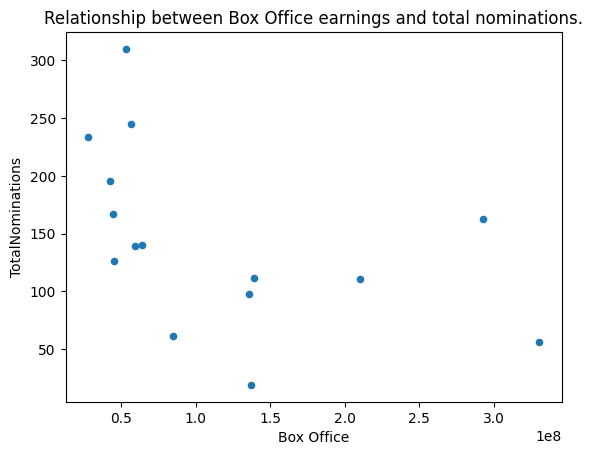

In [195]:
movies['TotalNominations'] = movies['Award Wins'] + movies['Award Nominations']
box_earnings = movies.sort_values(by='Box Office', ascending=False)
box_earnings.plot.scatter(x='Box Office', y='TotalNominations', title='Relationship between Box Office earnings and total nominations.')

## Is there a relationship between box office earnings and movie runtimes?
In this scatter plot the Box Office values needed to sorted and show a relationship between the runtime. For the most part the shorter the movie the less box office earnings that movie earned. But there were some movies with short runtimes that had a higher box office earning. The movies with the most box office earnings had a runtime of 140-145 minutes.

<Axes: title={'center': 'Relationship between Box Office earnings and runtimes.'}, xlabel='Box Office', ylabel='Runtime'>

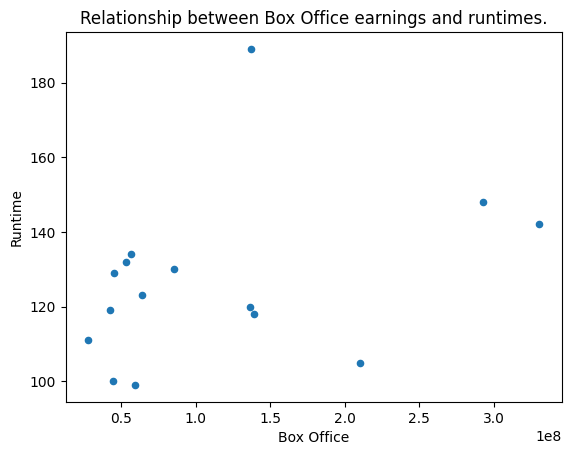

In [196]:
box_office = movies.sort_values(by='Box Office', ascending=False)
box_office.plot.scatter(x='Box Office', y='Runtime', title='Relationship between Box Office earnings and runtimes.')

## (Graph) How much did each movie earn at the box office?
In this bar chart the movie title had to grouped by the total box office earnings. Forrest Gump earned the most at the box office and Moonlight earned the least.

<Axes: title={'center': 'Amount each movie made at the box office.'}, xlabel='Movie Title'>

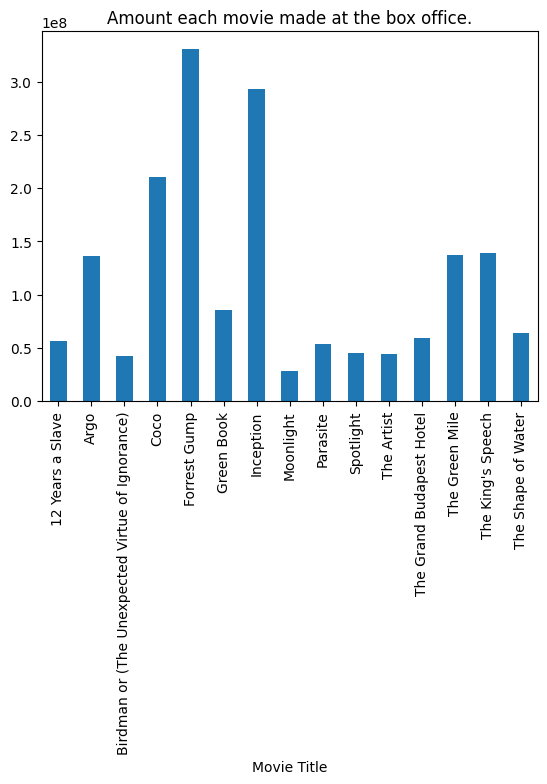

In [197]:
movie_earnings = movies.groupby('Movie Title').sum()['Box Office']
movie_earnings.plot(kind= 'bar', title='Amount each movie made at the box office.')

## (Graph) What is the total count of each genre present in the dataset? (How many times does fantasy, drama, adventure, etc. show up)

[Text(0, 0, 'Drama'),
 Text(1, 0, 'Biography'),
 Text(2, 0, 'Comedy'),
 Text(3, 0, 'Romance'),
 Text(4, 0, 'Crime'),
 Text(5, 0, 'Adventure'),
 Text(6, 0, 'Thriller'),
 Text(7, 0, 'Fantasy'),
 Text(8, 0, 'History'),
 Text(9, 0, 'Action'),
 Text(10, 0, 'Sci-Fi'),
 Text(11, 0, 'Animation')]

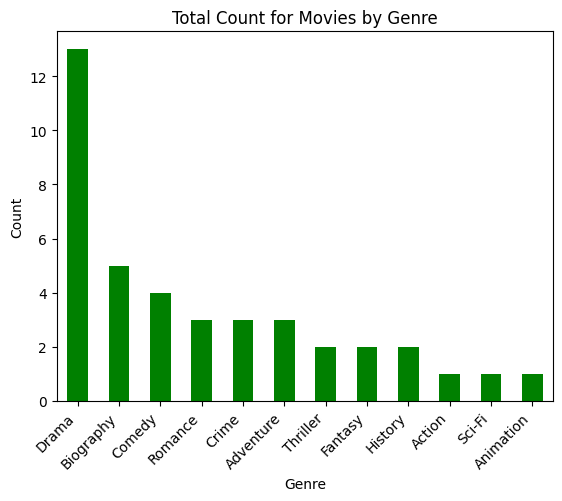

In [198]:
movies['Genre'] = movies['Genre'].str.split(', ')
total_genres = movies['Genre'].explode()
genre_counts = total_genres.value_counts()
ax = genre_counts.plot(kind='bar', color='green', xlabel='Genre', ylabel='Count', title='Total Count for Movies by Genre')
ax.set_xticks(range(len(genre_counts)))
ax.set_xticklabels(genre_counts.index, rotation=45, ha="right")

